Линейная регрессия. Создание датафрейма с значениями x1 и y.\

In [1]:
import pandas as pd
x1 = [3, 3, 6, 6, 7, 8, 9]
y = [10, 9.7, 11.6, 12.1, 13.2, 13.9, 15.6]
df = pd.DataFrame({'x1': x1, 'y': y})
print(df.to_string(index=False))

 x1    y
  3 10.0
  3  9.7
  6 11.6
  6 12.1
  7 13.2
  8 13.9
  9 15.6


Обучение модели простой (парной) линейной регрессии. Определяется признак (X) и целевая переменная (y). Данные разделяются на тренировочную (75%) и валидационную выборки (25%). Создание датафрейма с исходными известными значениями (y_valid) и предсказанных моделью predictions_valid, вывод датафрейма.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
X = df['x1']
y = df['y']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)
model = LinearRegression()
model.fit(np.array(X_train).reshape(-1, 1), y_train)
predictions_valid = model.predict(np.array(X_valid).reshape(-1, 1))
df_match = pd.DataFrame({'Actual': y_valid, 'Predicted': predictions_valid })
print(df_match.to_string(index=False))

 Actual  Predicted
   15.6  14.707547
   11.6  12.267925


Подсчет и вывод метрик качества регрессии (MSE, MAE, RMSE, R2).

In [4]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_valid, predictions_valid))
print('MSE:', metrics.mean_squared_error(y_valid, predictions_valid))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions_valid)))
print('R2:', metrics.r2_score(y_valid, predictions_valid))

MAE: 0.7801886792452821
MSE: 0.6212976148095395
RMSE: 0.7882243429440248
R2: 0.8446755962976151


*   Средняя абсолютная ошибка (MAE) показывает среднее абсолютное отклонение предсказанных значений от реальных. Поскольку диапазон значений целевой переменной y находится в пределах от 10 до 15.6, средняя абсолютная ошибка 0.78 является относительно небольшой.
*   Среднеквадратичная ошибка (MSE) вычисляет среднее квадратов разностей между предсказанными и реальными значениями. Значение 0.62 относительно небольшое значение, учитывая, что оно измеряет средние квадраты отклонений.
*   Корень из среднеквадратичной ошибки (RMSE) является квадратным корнем из MSE. Эта метрика также показывает, насколько предсказанные значения отличаются от реальных, но в той же единице измерения, что и целевая переменная. RMSE равен 0.79, это значение близко к MAE.
*   Коэффициент детерминации (R2) показывает, какая доля значений целевой переменной объясняется моделью. Значение 0.84 является хорошим показателем работы модели. \
Получение коэффициентов a и b с помощью coef_ и intercept_.


In [5]:
a = model.coef_
b = model.intercept_
print(a, b)

[0.81320755] 7.388679245283015


Коэффициент наклона 0.81320755 означает, что при увеличении значения признака x1 на 1 единицу предсказанное значение целевой переменной y увеличивается на 0.81320755 единицы. Переменная b - свободный член, это значение y, когда x1 равен 0. \
Визуализация регрессии, точки и линия регрессии.

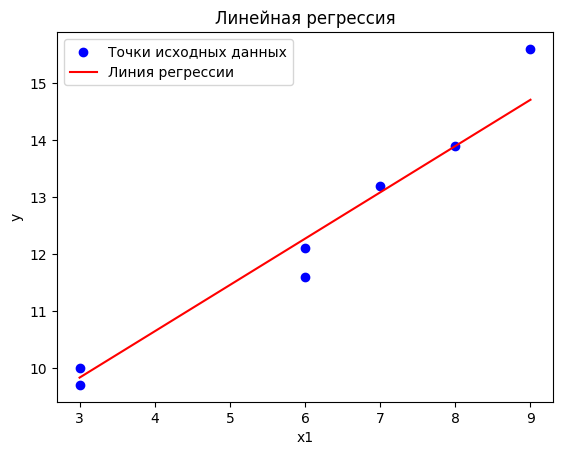

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x1, y, color='blue', label='Точки исходных данных')
plt.plot([3, 9], [a*3 + b, a*9 + b], color='red', label='Линия регрессии')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.legend()

На графике, представленном выше, точки - исходные данные, линия - линия регрессии. Можно сказать, что модель хорошо описывает зависимость между x1 и y, так как красная линия проходит близко к большинству синих точек. \
Построение графика с разницей предсказанного и истинного значения по каждой точке - график остатков.

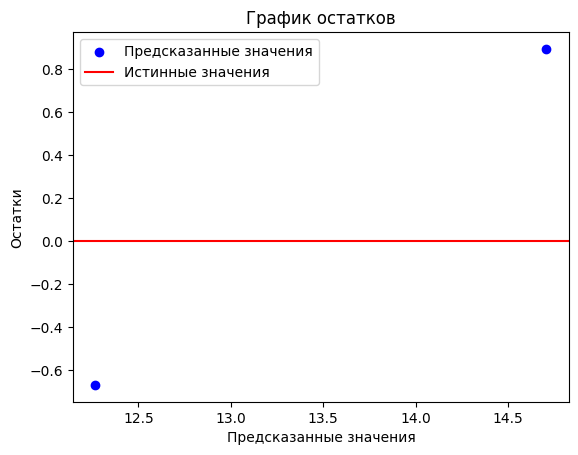

In [7]:
difference = y_valid - predictions_valid
plt.scatter(predictions_valid, difference, color='blue', label='Предсказанные значения')
plt.axhline(y=0, color='red', label='Истинные значения')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.legend()
plt.show()

На графике наглядно видно, что предсказанные значения располагаются на расстоянии от линии исходных значений. Можно увидеть приблизительные значения разницы между исходными и предсказанными значениями (приблизительно 0.6 и 0.8). Отличия направлений отдаления точек от линии указывает на то, что модель  не совсем правильно улавливает направление и тренд изменения значений.\
Создается график для сравнения исходных и предсказанных значений в зависимости от x1.

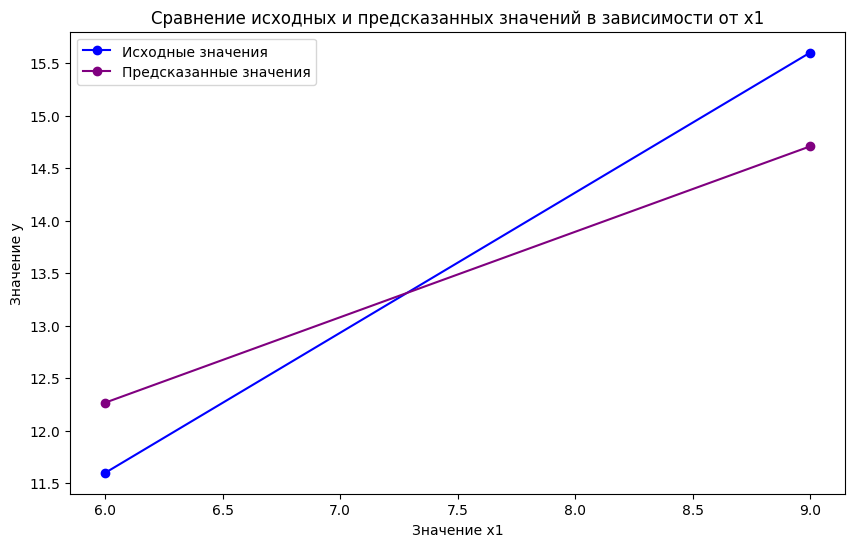

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(X_valid, y_valid, marker='o', linestyle='-', color='blue', label='Исходные значения')
plt.plot(X_valid, predictions_valid, marker='o', linestyle='-', color='purple', label='Предсказанные значения')
plt.xlabel('Значение x1')
plt.ylabel('Значение y')
plt.title('Сравнение исходных и предсказанных значений в зависимости от x1')
plt.legend()
plt.show()

На графике представлены две линии: синяя линия отображает исходные значения целевой переменной y, а фиолетовая — предсказанные моделью значения. Линия предсказания (фиолетовая) находится ниже линии истинных значений (синяя), что указывает на разницу значений предсказанных и заданных. Линии пересекаются, что означает, что модель неправильно улавливает направление и тренд изменения значений. Видно, что левая точка линии предсказаний находится выше левой точки линии исходных значений,  что соответствует выведенным выше значениям actual и predicted. Правые границы линий также соответветствуют значениям actual и predicted. \
Построение графика предсказанных значений по отношению к фактическим.


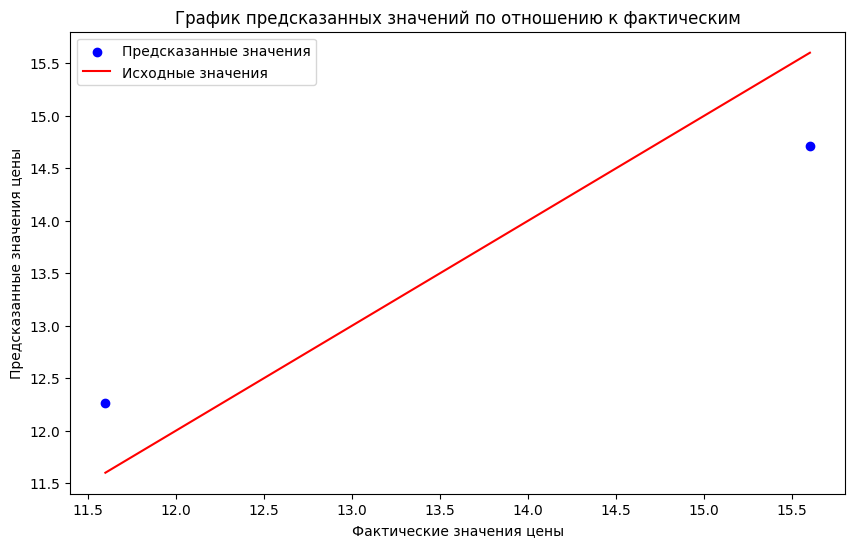

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, predictions_valid, label='Предсказанные значения', color='blue')
plt.plot(y_valid, y_valid, label='Исходные значения', color='red')
plt.xlabel('Фактические значения цены')
plt.ylabel('Предсказанные значения цены')
plt.title('График предсказанных значений по отношению к фактическим')
plt.legend()

Каждая точка представляет пару значений, истинное значение по оси x и предсказанное по оси y. Красная линия показывает линию идеальных предсказаний, то есть случаев, когда предсказанное значение точно совпадает с истинным. Так как точки предсказаний располагаются близко к красной линии, это означает, что предсказания относительно близки к истинным значениям и модель работает более менее точно.

Полиномиальная регрессия. Создаются массивы с входными данными x (двумерный массив) и y1. Обучение модели полиномиальной регрессии степени 2. Вывод метрик.

In [10]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([0, 1, 2, 3, 4, 5, 6]).reshape(-1, 1)
y1 = np.array([17.8, 27.4, 32.0, 43.7, 44.5, 41.4, 34.4])
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(x)
model1 = LinearRegression()
model1.fit(X_poly, y1)
y_pred = model1.predict(X_poly)
print(f"Полиномиальная степень: 2")
print('MAE:', metrics.mean_absolute_error(y1, y_pred))
print('R2:', metrics.r2_score(y1, y_pred))

Полиномиальная степень: 2
MAE: 1.7598639455782334
R2: 0.9434363714740509


*   Поскольку диапазон значений целевой переменной y находится в пределах от 17.8 до 34.4, средняя абсолютная ошибка (MAE) 1.76 является относительно небольшой.
*   Значение коэффициента детерминации (R2) 0.943 говорит о том, что модель хорошо подходит для данных и качественно предсказывает результаты. \
Построение графика полиномиальной регрессии со степенью 2.

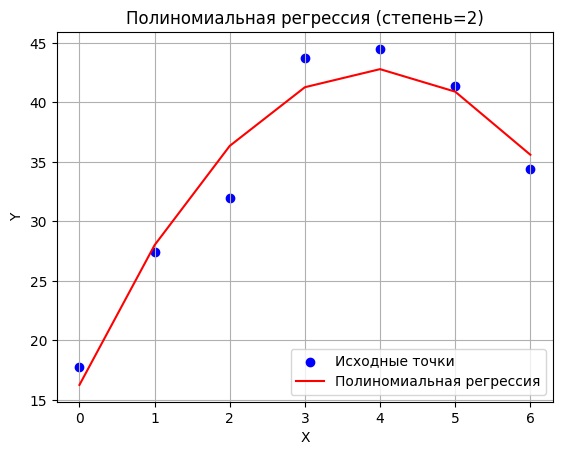

In [11]:
plt.scatter(x, y1, color='blue', label='Исходные точки')
plt.plot(x, y_pred, color='red', label='Полиномиальная регрессия')
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Полиномиальная регрессия (степень=2)")
plt.legend()
plt.grid(True)

На графике изображены синие точки - исходные данные, представляющие собой пары значений x и соответствующих им значений y1, красная линия - модель полиномиальной регрессии второй степени. Красная линия плавно изгибается и проходит близко к синим точкам. Это говорит о том, что полиномиальная регрессия более менее хорошо описывает зависимость между переменными. Модель учитывает нелинейные отношения, что делает её более гибкой по сравнению с линейной регрессией. \
Аналогичным образом обучается модель полиномиальной регрессии для степени полинома = 3.

In [12]:
poly_features = PolynomialFeatures(degree=3)
X_poly2 = poly_features.fit_transform(x)
model2 = LinearRegression()
model2.fit(X_poly2, y1)
y_pred2 = model2.predict(X_poly2)
print(f"Полиномиальная степень: 3")
print('MAE:', metrics.mean_absolute_error(y1, y_pred2))
print('R2:', metrics.r2_score(y1, y_pred2))

Полиномиальная степень: 3
MAE: 1.1312925170067964
R2: 0.9722054489614835


*   Поскольку диапазон значений целевой переменной y находится в пределах от 17.8 до 34.4, средняя абсолютная ошибка (MAE) 1.13 является небольшой.
*   Значение коэффициента детерминации (R2) 0.97 говорит о том, что модель хорошо подходит для данных и качественно предсказывает результаты. \
Построение графика полиномиальной регрессии со степенью 3.

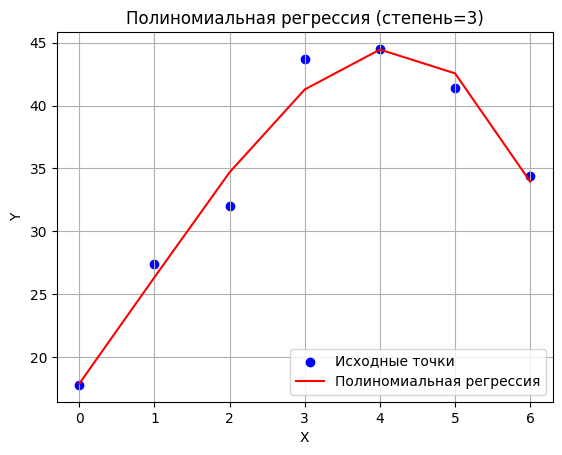

In [13]:
plt.scatter(x, y1, color='blue', label='Исходные точки')
plt.plot(x, y_pred2, color='red', label='Полиномиальная регрессия')
plt.xlabel("X")
plt.ylabel("Y")
plt.title(f"Полиномиальная регрессия (степень=3)")
plt.legend()
plt.grid(True)

Красная линия плавно изгибается и проходит близко к синим точкам, затрагивая их. Это говорит о том, что полиномиальная регрессия со степенью 3, в сравнении с предыдущей степенью, лучше описывает зависимость между переменными. \


Загружается набор данных carprice.csv. Для определения целевой переменной выводятся первые 5 строк таблицы.

In [14]:
data = pd.read_csv('carprice.csv')
print(data.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

Исходя из анализа таблицы, можно сделать вывод, что целевой переменной является столбец price, так как это значение, которое полезно и логично прогнозировать, используя данные остальных столбцов. \
Строится гистограмма для столбца price с помощью метода. Строится boxplot для столбца price.

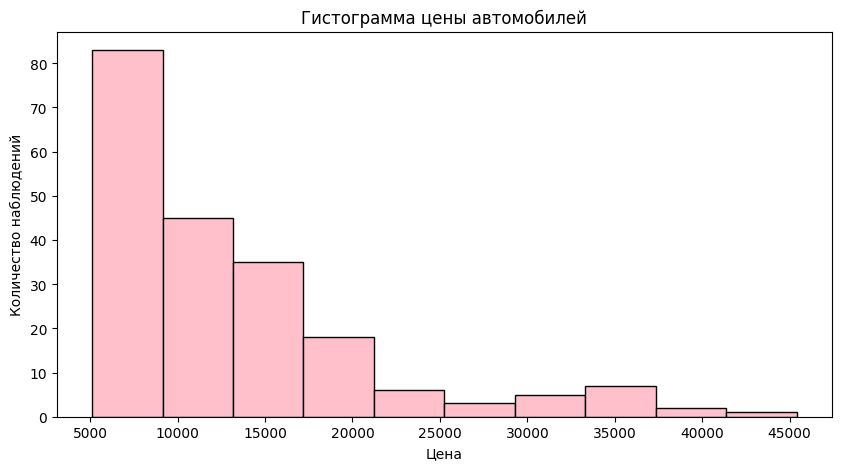

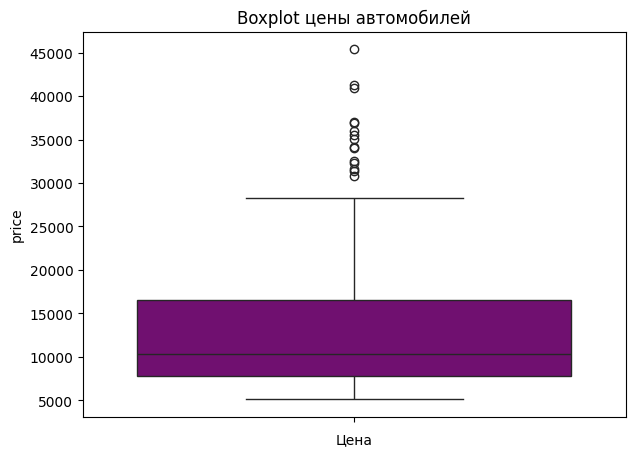

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 5))
plt.hist(data['price'], color='pink', edgecolor='black')
plt.xlabel('Цена')
plt.ylabel('Количество наблюдений')
plt.title('Гистограмма цены автомобилей')

plt.figure(figsize=(7, 5))
sns.boxplot(data['price'], color='purple')
plt.xlabel('Цена')
plt.title('Boxplot цены автомобилей')
plt.show()

Гистограмма показывает распределение значений переменной price (цена автомобилей) в наборе данных. Большинство данных сосредоточено в левой части графика, это может говорить о том, что большинство автомобилей имеют низкие цены. \
Boxplot также визуализирует распределение цен автомобилей в наборе данных. Медиана смещена ближе к нижней части ящика, это указывает на асимметрию распределения цен в сторону уменьшения цены. Точки за пределами ящика являются выбросами и представляют собой автомобили с аномально высокими ценами. \
Строится матрица рассеивания.

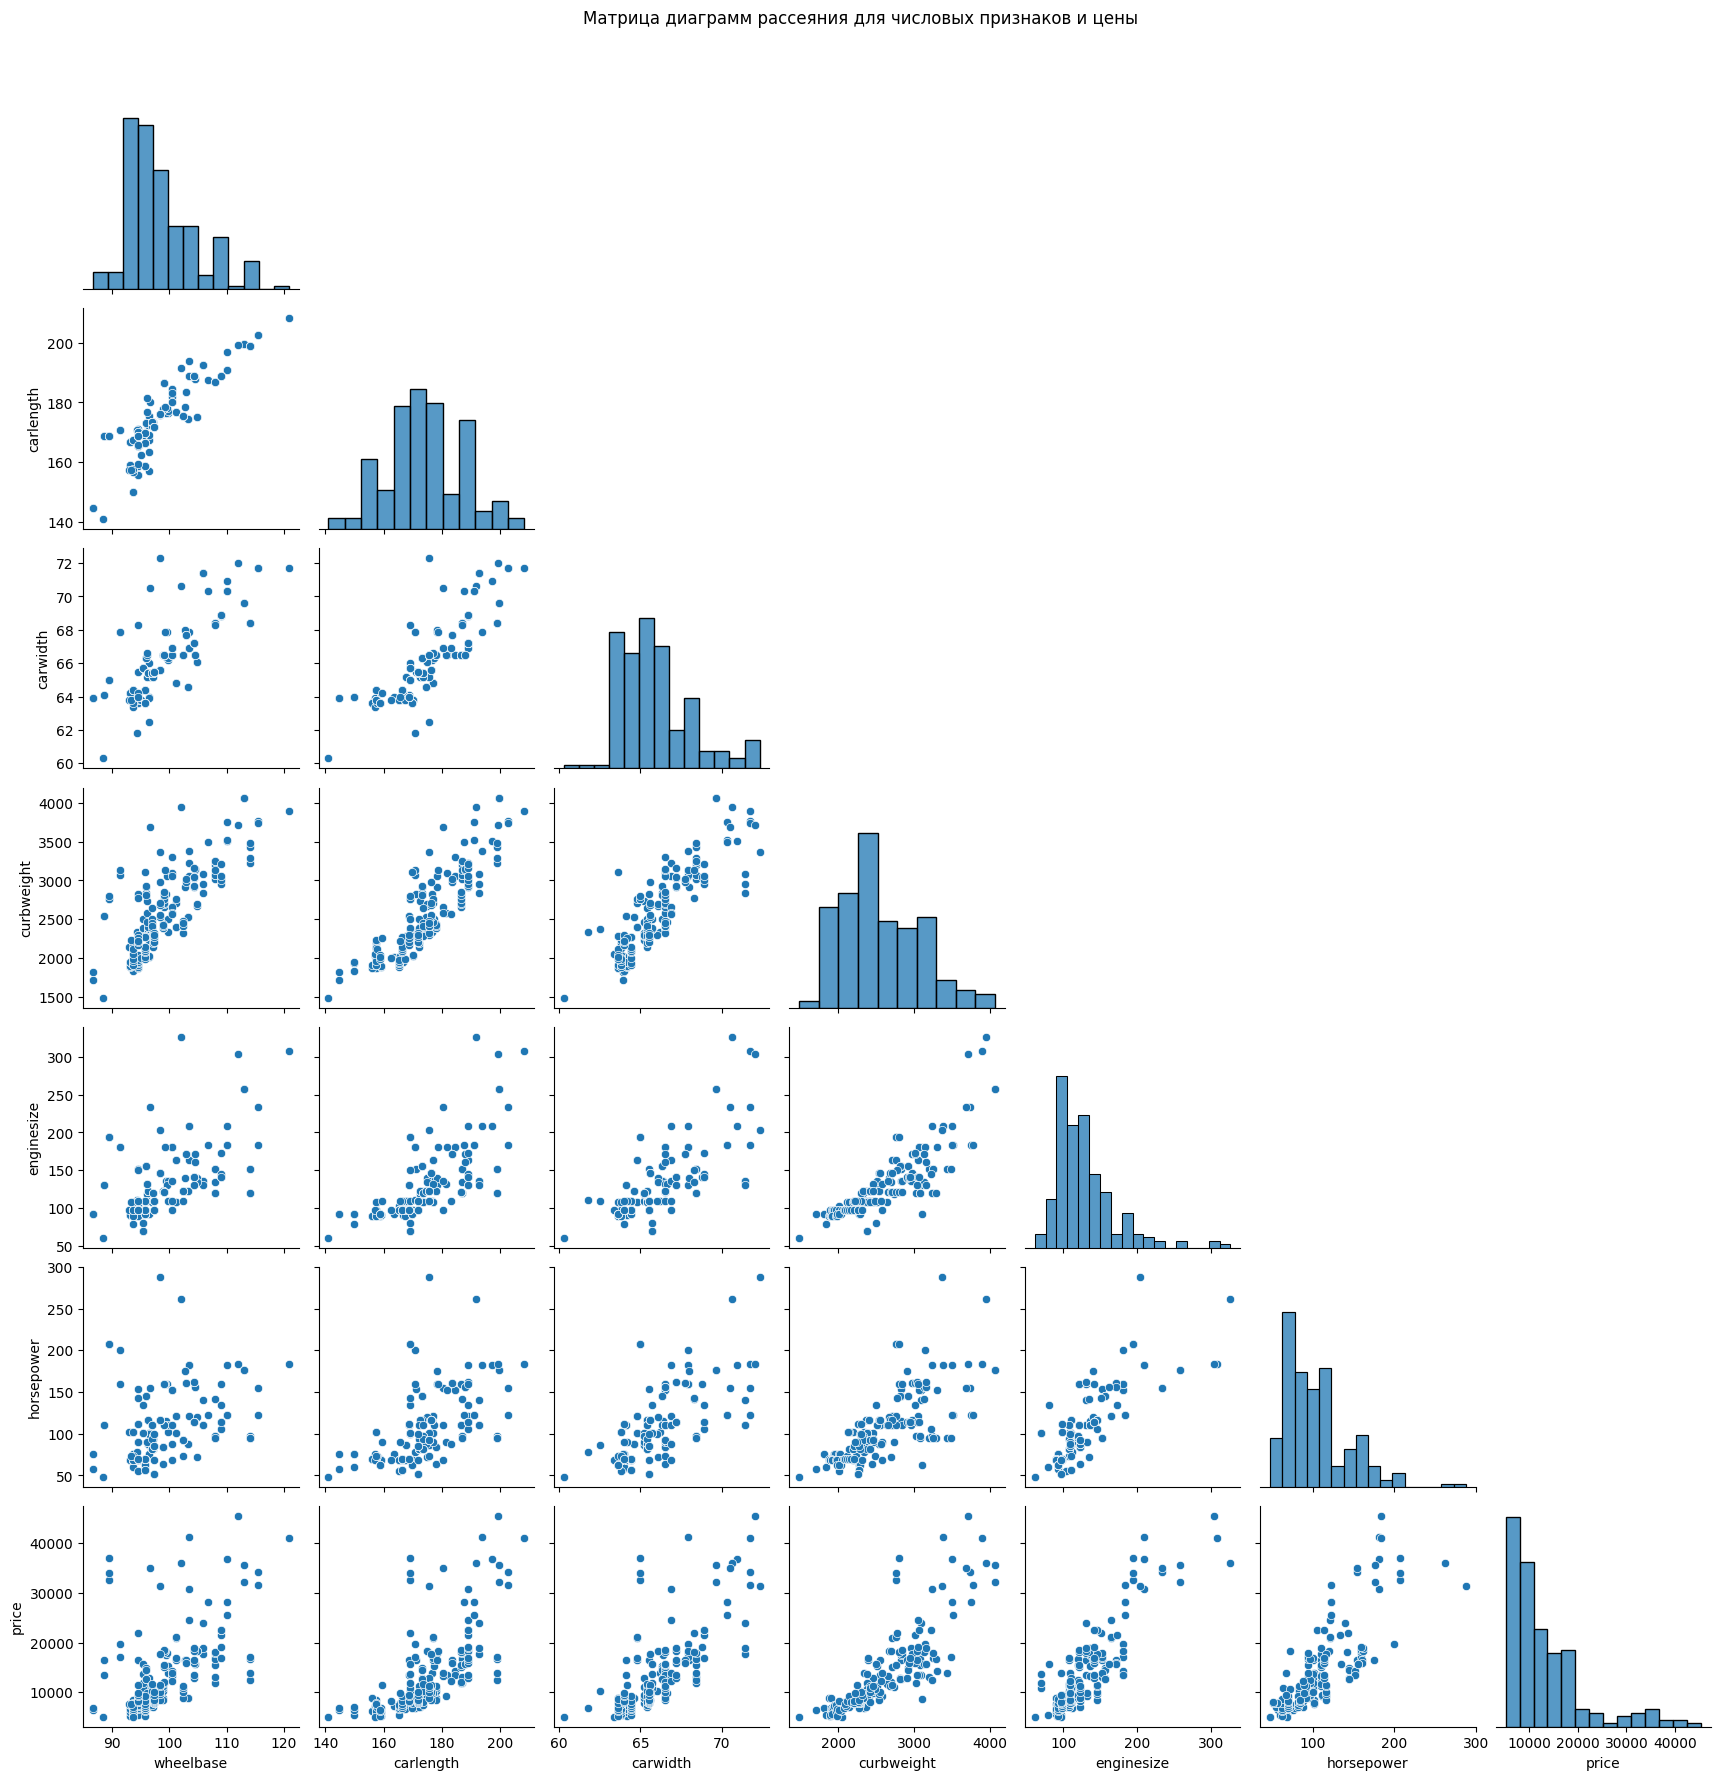

In [16]:
sns.pairplot(data[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'price']], corner=True)
plt.suptitle('Матрица диаграмм рассеяния для числовых признаков и цены', y=1.02)
plt.show()

На графике представлена матрица диаграмм рассеяния для числовых признаков из набора данных, а также их зависимости с целевой переменной price.
*   На гистограмме для признака price показано, как часто встречаются разные значения цен в наборе данных. Большинство автомобилей в датасете имеют относительно низкие цены.
*   График между curbweight (масса автомобиля) и enginesize (размер двигателя) показывает положительную корреляцию, чем больше масса автомобиля, тем крупнее его двигатель.
*   Взаимосвязь между horsepower (мощность двигателя) и price (цена) также положительная, автомобили с более высокой мощностью обычно стоят дороже.
*   Есть положительная корреляция между длиной автомобиля и его ценой. \
Разделение данных на обучающую и валидационную выборки. Нормализация данных с помощью StandardScaler. Используется модель линейной регрессии (LinearRegression) для обучения предсказания цен автомобилей. Далее обученная модель используется для предсказания на валидационной выборке. Создается датафрейм results с истинными и предсказанными значениями. Вывод датафрейма с истинными и предсказанными значениями.

In [17]:
from sklearn.preprocessing import StandardScaler
X3 = data[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower']]
y3 = data['price']
X_train3, X_valid3, y_train3, y_valid3 = train_test_split(X3, y3, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train3)
X_valid_scaled = scaler.transform(X_valid3)
model3 = LinearRegression()
model3.fit(X_train_scaled, y_train3)
predictions_valid3 = model3.predict(X_valid_scaled)
print('MAE:', metrics.mean_absolute_error(y_valid3, predictions_valid3))
print('MSE:', metrics.mean_squared_error(y_valid3, predictions_valid3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid3, predictions_valid3)))
print('R2:', metrics.r2_score(y_valid3, predictions_valid3))
results = pd.DataFrame({'Actual': y_valid3, 'Predicted': predictions_valid3})
print(results.to_string(index=False))

MAE: 2593.451897006583
MSE: 13080657.063921006
RMSE: 3616.7191021588897
R2: 0.8066694265608026
   Actual    Predicted
30760.000 25980.209944
17859.167 19094.598086
 9549.000 11293.239006
11850.000 13540.199700
28248.000 23872.099386
 7799.000  6503.933011
 7788.000  7661.689425
 9258.000  7263.917542
10198.000 10648.435402
 7775.000  7037.743274
13295.000 15065.540026
 8238.000  7097.426485
18280.000 15575.243750
 9988.000 12241.418808
40960.000 38088.003462
 6488.000  5669.889485
 5151.000  -573.387250
12629.000 18691.657885
 8189.000 11280.442001
 9960.000 10426.660839
 8495.000 11704.706662
13499.000 21619.773829
 8249.000  6514.500855
 6479.000  5122.900098
 6692.000  5942.887109
41315.000 26871.802322
 9639.000 15124.398894
13415.000 16575.867540
 7999.000  6453.529559
12940.000 16314.757639
25552.000 23369.141790
 6229.000  5895.801717
 7898.000  6091.865093
21485.000 21287.007355
 7689.000  8864.376416
28176.000 23350.825666
11259.000 11777.787264
10945.000  8218.727551
 8916.50

*   Поскольку диапазон значений целевой переменной y находится в пределах от 5118.0 до 45400.0, средняя абсолютная ошибка 2593.45 является относительно небольшой.
*   Значение среднеквадратичной ошибки 13080657 это значительно высокое значение. Однако, учитывая, что оно измеряет средние квадраты отклонений, его абсолютное значение зависит от масштаба данных, в данном случае масштаб большой.
*   Корень из среднеквадратичной ошибки равен 3616.72, это значение близко к средней абсолютной ошибке, что подтверждает, что ошибки модели в целом стабильны и нет значительных выбросов.
*   Значение коэффициента детерминации 0.81 является хорошим показателем работы модели. \
Создается датафрейм с коэффициентами признаков.

In [18]:
coefficients = pd.DataFrame({'Признак': X3.columns, 'Коэффициент': model3.coef_})
coefficients = coefficients.sort_values(by='Коэффициент', ascending=False)
print(coefficients)

      Признак  Коэффициент
4  enginesize  3159.318917
5  horsepower  2354.131394
2    carwidth  1369.506469
3  curbweight  1097.142729
0   wheelbase    48.949822
1   carlength  -183.057916


На основе значений коэффициентов делается выводы о том, какие признаки являются наиболее важными для модели по влиянию на предсказания.
*   Наиболее значимый признак - enginesize (3159.32). Увеличение размера двигателя связано с ростом цены автомобиля.
*   Высокий положительный коэффициент horsepower (2354.13), что указывает на то, что увеличение мощности автомобиля также положительно влияет на его цену.
*   Почти неоказывающий влияния коэффициент wheelbase (48.95).
*   Отрицательные коэффициент - carlength (-183.06) говорит о том, что уменьшение цены автомобиля связано с увеличением его длины. \
Создается график остатков для сравнения фактических и предсказанных значений.


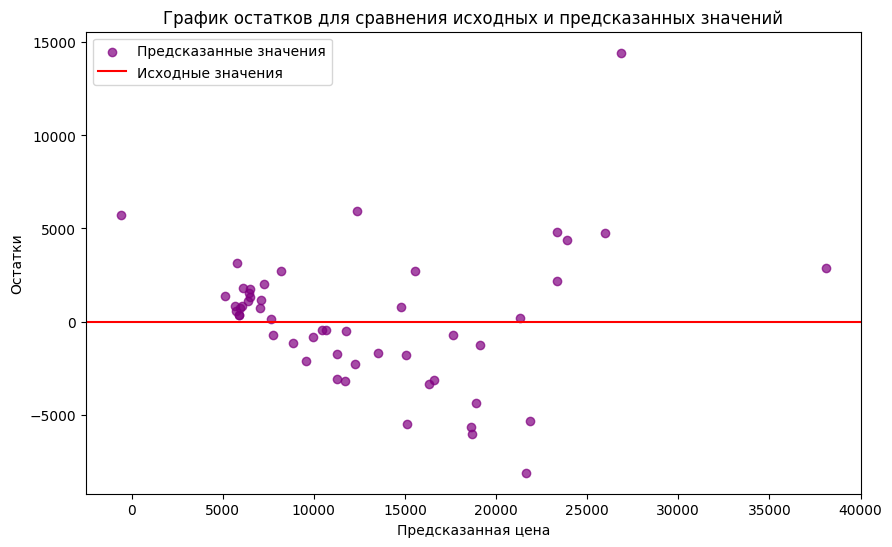

In [19]:
residuals = y_valid3 - predictions_valid3
plt.figure(figsize=(10, 6))
plt.scatter(predictions_valid3, residuals, color='purple', alpha=0.7, label='Предсказанные значения')
plt.axhline(y=0, color='red', label='Исходные значения')
plt.xlabel('Предсказанная цена')
plt.ylabel('Остатки')
plt.title('График остатков для сравнения исходных и предсказанных значений')
plt.legend()
plt.show()

На графике видно, что остатки распределены неравномерно и не вокруг горизонтальной линии y = 0, что указывает на проблемы с точностью модели. На графике заметно, что для более низких предсказанных цен остатки сосредоточены вокруг линии, но с увеличением предсказанных цен остатки становятся более разбросанными. Это может означать, что модель на определенных диапазонах данных (от 15000 до 30000) работает некорректно.
На графике есть несколько заметных выбросов, особенно для более высоких значений предсказанных цен. \
Решение задачи регрессии, используя метод k-ближайших соседей. Разделение данных на тренировочную и тестовую выборки. Создается модель KNeighborsRegressor, для предсказания модели будут использоваться 5 ближайших соседей. Модель обучается на тренировочных данных. Создается датафрейм с фактическими и предсказанными значениями.


In [20]:
from sklearn.neighbors import KNeighborsRegressor
X4 = data[['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower']]
y4 = data['price']
X_train4, X_valid4, y_train4, y_valid4 = train_test_split(X4, y4, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train_scaled4 = scaler.fit_transform(X_train4)
X_valid_scaled4 = scaler.transform(X_valid4)

knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train_scaled4, y_train4)

predictions_knn = knn_model.predict(X_valid_scaled4)
results_knn = pd.DataFrame({'Actual': y_valid4, 'Predicted': predictions_knn})
print(results_knn.to_string(index=False))
print('MAE:', metrics.mean_absolute_error(y_valid4, predictions_knn))
print('MSE:', metrics.mean_squared_error(y_valid4, predictions_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid4, predictions_knn)))
print('R2:', metrics.r2_score(y_valid4, predictions_knn))

   Actual  Predicted
30760.000   17217.30
17859.167   17012.30
 9549.000    9012.00
11850.000   12909.00
28248.000   21065.50
 7799.000    6972.10
 7788.000    7624.00
 9258.000    7574.00
10198.000    9015.80
 7775.000    8220.00
13295.000   12785.40
 8238.000    7513.70
18280.000   13860.60
 9988.000   11192.20
40960.000   31785.50
 6488.000    6472.05
 5151.000    6507.65
12629.000   14245.60
 8189.000    9015.80
 9960.000    8518.80
 8495.000   10666.40
13499.000   16703.80
 8249.000    6588.90
 6479.000    6293.35
 6692.000    6539.25
41315.000   19255.00
 9639.000   14257.90
13415.000   17436.50
 7999.000    7153.30
12940.000   15836.00
25552.000   21155.00
 6229.000    6636.95
 7898.000    7493.70
21485.000   18736.30
 7689.000    8034.10
28176.000   19079.00
11259.000    9744.70
10945.000   10876.30
 8916.500    6266.55
14489.000   14245.60
 7463.000    8114.50
18344.000   10251.40
15580.000   17227.00
 6918.000    7493.70
 7499.000    6846.40
 9095.000    8402.30
 6229.000    

*   Поскольку диапазон значений целевой переменной y находится в пределах от 5118.0 до 45400.0, средняя абсолютная ошибка 2455 является относительно небольшой.
*   Значение среднеквадратичной ошибки 21119052,56 - значительно высокое значение. Однако, учитывая, что оно измеряет средние квадраты отклонений, его абсолютное значение зависит от масштаба данных.
*   Корень из среднеквадратичной ошибки равен 4595.55 - это значение отличается от MAE, что может говорить о недостоверности модели, или о значительных выбросах.
*   Значение коэффициента детерминации 0.69 является не очень хорошим показателем работы модели. \
Создается график остатков для сравнения фактических и предсказанных значений.

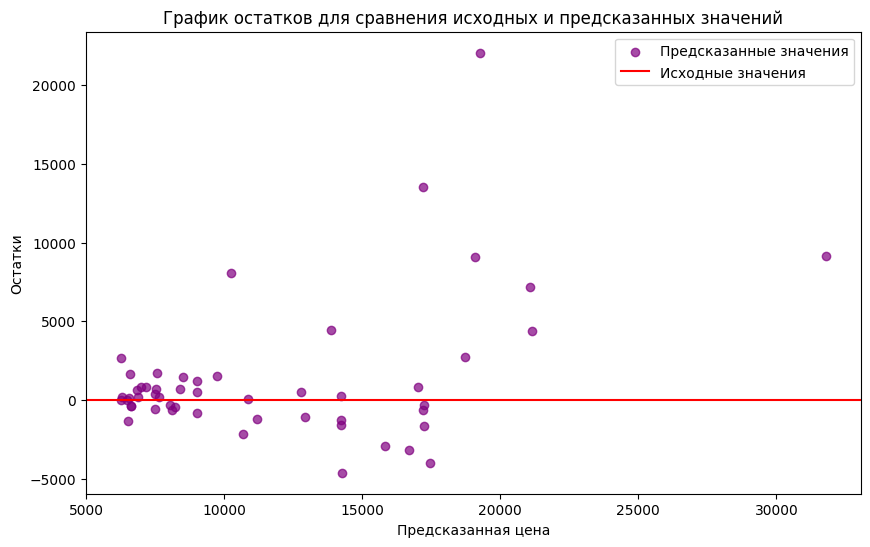

In [21]:
residuals4 = y_valid4 - predictions_knn
plt.figure(figsize=(10, 6))
plt.scatter(predictions_knn, residuals4, color='purple', alpha=0.7, label='Предсказанные значения')
plt.axhline(y=0, color='red', label='Исходные значения')
plt.xlabel('Предсказанная цена')
plt.ylabel('Остатки')
plt.title('График остатков для сравнения исходных и предсказанных значений')
plt.legend()
plt.show()

Из графика можно увидеть, большинство точек сосредоточено около нуля. Некоторые точки значительно удалены от основной массы данных (например, остатки свыше 20,000). Это указывает на наличие выбросов. \
Для сравнения работы метода линейной регрессии и метода k-ближайших соседей создается график с результатми предсказаний обоих методов (в виде точек) и линией истинных значений.

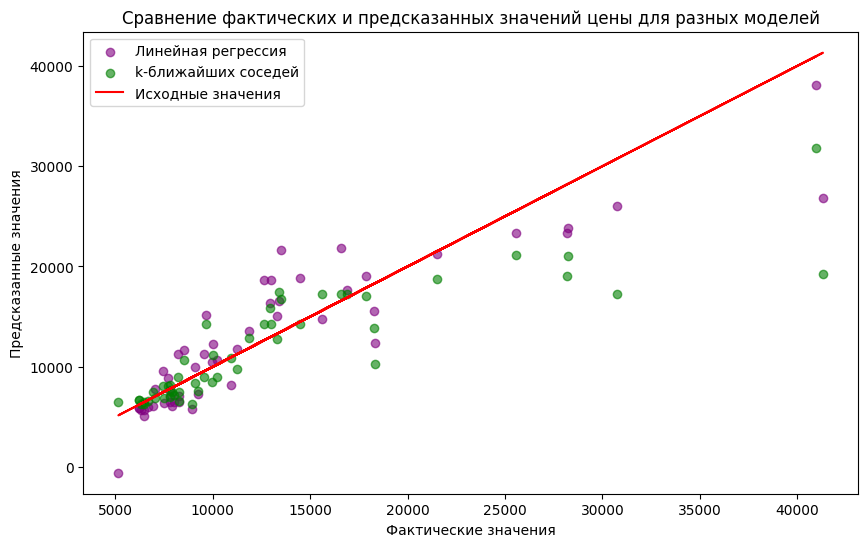

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid3, predictions_valid3, label='Линейная регрессия', color='purple', alpha=0.6)
plt.scatter(y_valid4, predictions_knn, label='k-ближайших соседей', color='green', alpha=0.6)
plt.plot(y_valid3, y_valid4, color='red', label='Исходные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.title('Сравнение фактических и предсказанных значений цены для разных моделей')
plt.show()


Исходя из графика, можно сделать вывод, что линейная регрессия, в основном, справляется с предсказаниями для небольших значений цены (от 5,000 до примерно 15,000). В этом диапазоне фиолетовые точки приближены к красной линии, что указывает на приемлемую точность модели. Однако по мере увеличения фактических значений цены (более 20,000) линейная регрессия демонстрирует отклонение от идеальной линии. Некоторые точки значительно завышены по сравнению с фактическими значениями, указывая на тенденцию к переоценке высоких значений цены. \
Метод k-ближайших соседей лучше справляется с предсказаниями для средних и высоких значений цены. В диапазоне от 10,000 до примерно 30,000 зеленые точки часто ближе к красной линии, чем фиолетовые. Однако метод k-ближайших соседей иногда недооценивает цену, особенно при высоких значениях, и результаты могут быть более разбросанными по сравнению с линейной регрессией. \
Для сравнения работы моделей линейной регрессии и метода k-ближайших соседей можно сравнить их по основным метрикам:
*   Cредняя абсолютная ошибка. Для линейной регрессии 2593.4, для KNN 2455.01. KNN показывает немного меньшую MAE, что указывает на меньшую среднюю ошибку предсказания по сравнению с линейной регрессией.
*   Cреднеквадратичная ошибка. Для линейной регрессии 13,080,657.06, для KNN 21,119,052.56. MSE у линейной регрессии значительно меньше, чем у KNN. Это говорит о том, что у KNN больше ошибок с большими отклонениями, так как MSE чувствительна к большим ошибкам из-за возведения в квадрат.
*   Корень из среднеквадратичной ошибки. Для линейной регрессии 3616.72, для KNN 4595.55. Линейная регрессия снова показывает лучший результат по RMSE, что согласуется с MSE. Это указывает на то, что в среднем ошибки линейной регрессии меньше по величине, чем у KNN.
*   Коэффициент детерминации. Для линейной регрессии 0.807, для KNN 0.688. R2 для линейной регрессии ближе к 1, что означает, что она лучше объясняет дисперсию целевой переменной по сравнению с KNN. \


Повторно создается датафрейм на основе датасета carprice. Выводятся первые 5 строк датафрейма для того, чтобы выделить категориальные переменные.



In [23]:
data2 = pd.read_csv('carprice.csv')
print(data2.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

В результате анализа выведенных первых 5 строк датафрейма определены категориальные переменные - symboling, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, fuelsystem. \
Применяется кодировка к категориальным переменным. Вывод закодированных данных.

In [24]:
from sklearn.preprocessing import OrdinalEncoder
categorical_columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']
encoder = OrdinalEncoder()
data2[categorical_columns] = encoder.fit_transform(data2[categorical_columns])
print(data2[categorical_columns].head())

   symboling  fueltype  aspiration  doornumber  carbody  drivewheel  \
0        5.0       1.0         0.0         1.0      0.0         2.0   
1        5.0       1.0         0.0         1.0      0.0         2.0   
2        3.0       1.0         0.0         1.0      2.0         2.0   
3        4.0       1.0         0.0         0.0      3.0         1.0   
4        4.0       1.0         0.0         0.0      3.0         0.0   

   enginelocation  fuelsystem  
0             0.0         5.0  
1             0.0         5.0  
2             0.0         5.0  
3             0.0         5.0  
4             0.0         5.0  


После применения OrdinalEncoder каждое уникальное значение категории было заменено на определенное число. Это позволяет модели работать с этими данными, используя числовые значения вместо текстовых. \
Разделение на признаки (категориальные) и целевую переменную. Разделение на тренировочную и тестовую выборки. Обучение модели с учетом категориальных признаков. Выполнение предсказаний. Вывод метрик для оценки качества работы модели. Вывод датафрейма.

In [25]:
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower']
X5 = data2[categorical_columns + numerical_columns]
y5 = data2['price']
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.25, random_state=42)
model5 = LinearRegression()
model5.fit(X_train5, y_train5)
predictions_valid5 = model5.predict(X_test5)
results5 = pd.DataFrame({'Actual': y_test5, 'Predicted': predictions_valid5})
print(results5.to_string(index=False))
print('MAE:', metrics.mean_absolute_error(y_test5, predictions_valid5))
print('MSE:', metrics.mean_squared_error(y_test5, predictions_valid5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test5, predictions_valid5)))
print('R2:', metrics.r2_score(y_test5, predictions_valid5))

   Actual    Predicted
30760.000 23833.699044
17859.167 16406.853512
 9549.000 10725.734741
11850.000 13300.474458
28248.000 24161.002965
 7799.000  6245.457053
 7788.000  8306.472924
 9258.000  7397.667137
10198.000  9235.115850
 7775.000  7076.842001
13295.000 14411.731880
 8238.000  7576.678386
18280.000 16173.332145
 9988.000 12859.617493
40960.000 38045.106295
 6488.000  7309.055549
 5151.000  -563.697419
12629.000 16897.719790
 8189.000 11291.986090
 9960.000  9815.028414
 8495.000 11859.078443
13499.000 19437.919775
 8249.000  7661.134165
 6479.000  5083.887702
 6692.000  6456.154926
41315.000 23628.221279
 9639.000 15510.865908
13415.000 15918.984650
 7999.000  5681.400552
12940.000 15952.929134
25552.000 24288.392956
 6229.000  7171.994190
 7898.000  4732.385721
21485.000 21660.549315
 7689.000  7279.068616
28176.000 24577.502833
11259.000  9902.239900
10945.000  9778.283565
 8916.500  5945.666168
14489.000 17154.648346
 7463.000  8778.018420
18344.000 14122.033429
15580.000 1

*   Поскольку диапазон значений целевой переменной y находится в пределах от 5118.0 до 45400.0, средняя абсолютная ошибка 2476.19 является относительно небольшой.
*   Значение среднеквадратичной ошибки 13449359.65, это значительно высокое значение. Однако, учитывая, что оно измеряет средние квадраты отклонений, его абсолютное значение зависит от масштаба данных.
*   Корень из среднеквадратичной ошибки равен 3667.34, это значение близко к MAE, что подтверждает, что ошибки модели в целом стабильны и нет значительных выбросов.
*   Значение коэффициента детерминации 0.80 является хорошим показателем работы модели. \
Создается график остатков для сравнения фактических и предсказанных значений.

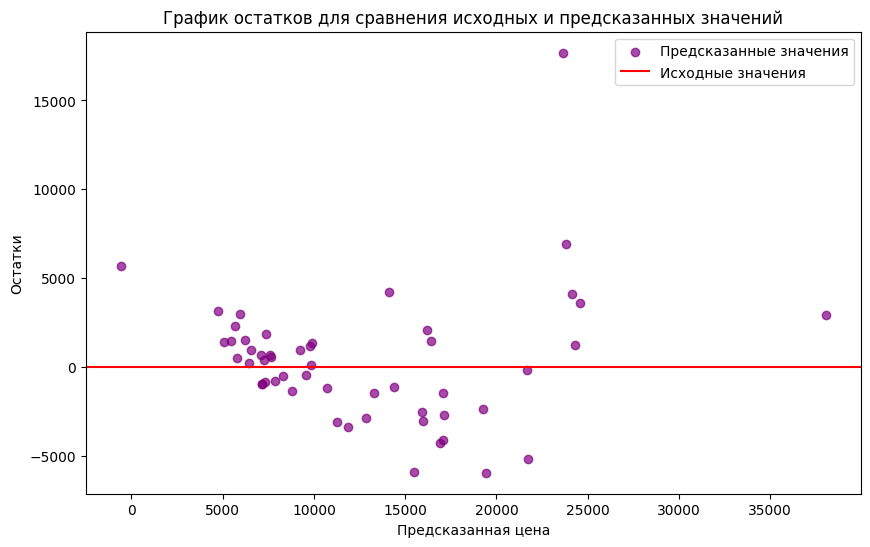

In [26]:
residuals5 = y_test5 - predictions_valid5
plt.figure(figsize=(10, 6))
plt.scatter(predictions_valid5, residuals5, color='purple', alpha=0.7, label='Предсказанные значения')
plt.axhline(y=0, color='red', label='Исходные значения')
plt.xlabel('Предсказанная цена')
plt.ylabel('Остатки')
plt.title('График остатков для сравнения исходных и предсказанных значений')
plt.legend()
plt.show()

В основном, остатки сгруппированы ближе к нулю, что указывает на хорошую точность модели для большинства предсказаний. Однако имеются несколько точек, значительно удаленных от линии нуля. Точки, находящиеся далеко от нулевой линии, могут быть выбросами или указывать на то, что модель плохо справляется с определенными предсказаниями. \
Для сравнения работы метода линейной регрессии без учета категориальных признаков и метода линейной регрессии с учетом категориальных признаков создается график с результатми предсказаний обоих методов (в виде точек) и линией истинных значений.

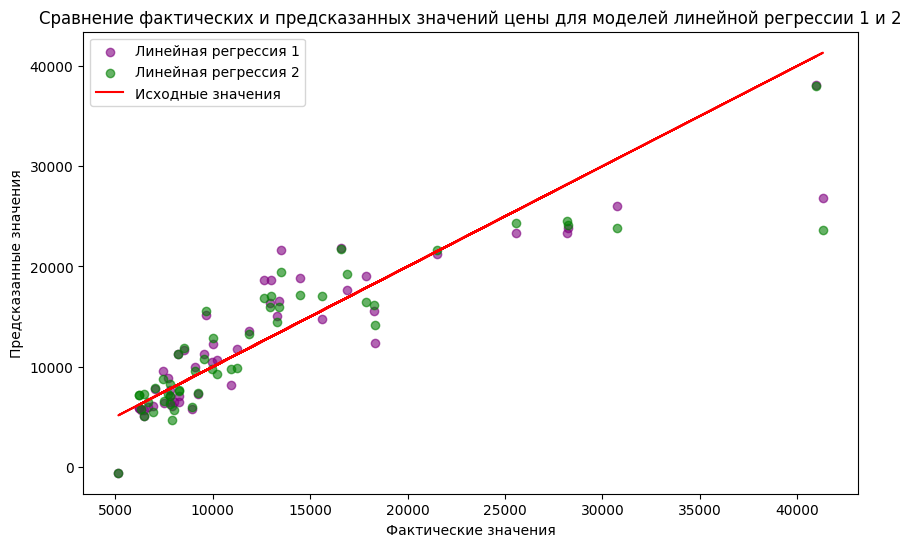

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid3, predictions_valid3, label='Линейная регрессия 1', color='purple', alpha=0.6)
plt.scatter(y_test5, predictions_valid5, label='Линейная регрессия 2', color='green', alpha=0.6)
plt.plot(y_valid3, y_test5, color='red', label='Исходные значения')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.title('Сравнение фактических и предсказанных значений цены для моделей линейной регрессии 1 и 2')
plt.show()

В случае фиолетовых точек (Линейная регрессия 1) и зеленых точек (Линейная регрессия 2) можно увидеть, что обе модели делают достаточно точные предсказания, но распределение точек имеет различия. Линейная регрессия 2 имеет более плотное расположение вдоль красной линии по сравнению с линейной регрессией 1. Это указывает на то, что учет категориальных признаков улучшил точность предсказаний. Линейная регрессия 1 показывает больший разброс, что свидетельствует о худших предсказаниях модели без учета категориальных данных. Наличие точек, удаленных от линии, может указывать на выбросы или на участки, где обе модели предсказывают значения хуже. \
Линейная регрессия 2 (с учетом категориальных признаков) демонстрирует лучшее соответствие фактическим значениям, чем Линейная регрессия 1, что подчеркивает важность учета категориальных данных для повышения точности.